In [3]:
# Import libraries
import matplotlib.pyplot as plt # Matplotlib is used for plotting
import pandas as pd             # Pandas helps organize data structures
import numpy as np              # Numpy provides mathematical functions like sqrt()
import statsmodels.formula.api as smf  # Statsmodel provides linear regression

import statsmodels.api as sm
from scipy.stats import pearsonr

from mpl_toolkits.mplot3d import Axes3D

In [4]:
data=pd.read_csv('data_collection_final_1208.csv')
data

,project_name,stars_count,Language,Domain,commits_count_total,commits_count_max,commits_count_avg,contributors_count_max,minor_count_max,contributors_count_avg,minor_count_avg,created year
0,"GitHub - zxing/zxing: ZXing (""Zebra Crossing"")...",28700,Java,android,3622,2654,4,7,17,1,0,2011
1,GitHub - zoozooll/3DModel_Tvbox_Manual: androi...,1,Java,android,2,1,1,1,0,1,0,2012
2,GitHub - zeusbaba/generic-store-for-android: G...,23,Java,android,42,18,2,2,1,1,0,2010
3,GitHub - ZenIsBestWolf/iDevice-Assets: iDevice...,1,Markdown,ios,6,3,1,1,0,1,0,2019
4,GitHub - yurenju/PrismFlipper: Animation trans...,2,Java,android,5,2,1,1,0,1,0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
303,GitHub - A2L5E0X1/debloat-adb: Bash Debloat-Sc...,22,Shell,android,47,11,3,2,2,1,0,2020
304,GitHub - 0x0c/UIAlertView-Blocks: UIAlertView ...,1,Objective-C,ios,4,2,1,1,0,1,0,2012
305,GitHub - 0x0c/M2DSequentialURLConnection,0,Objective-C,ios,7,3,1,2,1,1,0,2013
306,GitHub - 0x0c/CutomImagePickerController: can ...,6,Objective-C,ios,9,22,4,1,0,1,0,2011


In [5]:
data2 = data[['stars_count', 'Language', 'Domain', 'created year', 'commits_count_total', 'contributors_count_max', 'minor_count_max']]
data2

,stars_count,Language,Domain,created year,commits_count_total,contributors_count_max,minor_count_max
0,28700,Java,android,2011,3622,7,17
1,1,Java,android,2012,2,1,0
2,23,Java,android,2010,42,2,1
3,1,Markdown,ios,2019,6,1,0
4,2,Java,android,2011,5,1,0
...,...,...,...,...,...,...,...
303,22,Shell,android,2020,47,2,2
304,1,Objective-C,ios,2012,4,1,0
305,0,Objective-C,ios,2013,7,2,1
306,6,Objective-C,ios,2011,9,1,0


In [6]:
# RQ4
reg_commit = smf.ols('stars_count ~ 1 + commits_count_total', data=data2).fit()
reg_commit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            stars_count   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     35.15
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           8.23e-09
Time:                        09:45:59   Log-Likelihood:                -3241.4
No. Observations:                 308   AIC:                             6487.
Df Residuals:                     306   BIC:                             6494.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1184.5566    581.557      2.037      0.043      40.199    2328.914
commits_count_total     3.0667      0.517      5.929      0.000       2.049       4.085
==============================================================================
Omnibus:                      329.485   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11883.349
Skew:                           4.646   Prob(JB):                         0.00
Kurtosis:                      31.977   Cond. No.                     1.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

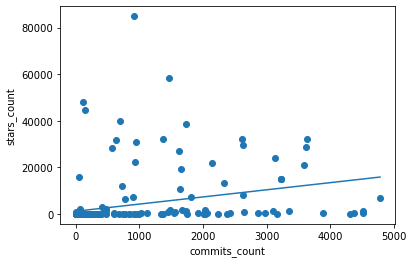

In [7]:
beta0, beta1 = reg_commit.params.Intercept, reg_commit.params.commits_count_total
x = data2['commits_count_total'].sort_values()
y = beta0 + beta1*x 

fig, ax = plt.subplots()
ax.scatter(data2['commits_count_total'], data2['stars_count'])
ax.set_xlabel('commits_count')
ax.set_ylabel('stars_count')

ax.plot(x, y)

plt.show()

In [8]:
data_new = sm.add_constant(data2[['commits_count_total']])
y_hat = reg_commit.predict(data_new)
corr, p = pearsonr(data2['stars_count'], y_hat)
print(corr)

0.32098845087692346


In [9]:
# RQ3
reg_ctrb = smf.ols('stars_count ~ 1 + contributors_count_max + minor_count_max', data=data2).fit()
reg_ctrb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            stars_count   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     104.8
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           2.27e-35
Time:                        09:46:07   Log-Likelihood:                -3177.6
No. Observations:                 308   AIC:                             6361.
Df Residuals:                     305   BIC:                             6372.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                119.3892    652.156      0.183      0.855   -1163.905    1402.684
contributors_count_max   350.0839    224.290      1.561      0.120     -91.268     791.436
minor_count_max          266.5969     22.342     11.932      0.000     222.633     310.561
==============================================================================
Omnibus:                      277.879   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6418.346
Skew:                           3.696   Prob(JB):                         0.00
Kurtosis:                      24.106   Cond. No.                         36.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

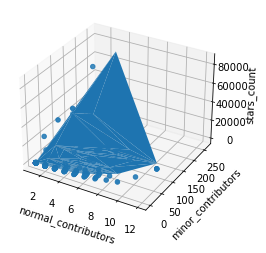

In [10]:
data_new2 = sm.add_constant(data2[['contributors_count_max', 'minor_count_max']])
y_hat2 = reg_ctrb.predict(data_new2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data2['contributors_count_max'], data2['minor_count_max'], data2['stars_count'])
#ax.plot(data3['minor_contributors'], data3['normal_contributors'], y_hat2)
ax.plot_trisurf(data2['contributors_count_max'], data2['minor_count_max'], y_hat2)
ax.set_xlabel('normal_contributors')
ax.set_ylabel('minor_contributors')
ax.set_zlabel('stars_count')
plt.show()

In [11]:
corr, p = pearsonr(data2['stars_count'], y_hat2)
print(corr)

0.6382158479269402


In [12]:
# RQ2
data2['stars_count'] = pd.to_numeric(data2['stars_count'])

<ipython-input-12-85a9fff1e2f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['stars_count'] = pd.to_numeric(data2['stars_count'])


In [13]:
data_p = data2[data2['stars_count'] > 100]
data_p

,stars_count,Language,Domain,created year,commits_count_total,contributors_count_max,minor_count_max
0,28700,Java,android,2011,3622,7,17
10,7300,TypeScript,ios,2016,1808,6,44
12,361,Java,android,2014,2061,7,24
19,19400,Python,ios,2020,1663,3,40
20,8100,Python,ios,2018,2631,2,15
...,...,...,...,...,...,...,...
289,39800,Kotlin,android,2016,700,6,23
292,31600,Markdown,ios,2016,630,2,1
295,1400,Markdown,ios,2016,480,5,26
296,22200,Swift,ios,2016,927,5,31


In [14]:
print(len(data_p))

72


In [15]:
dom_count_p = data_p.groupby('Domain').size()
dom_count_p

Domain
android    34
ios        38
dtype: int64

Text(0.5, 1.0, 'Popular')

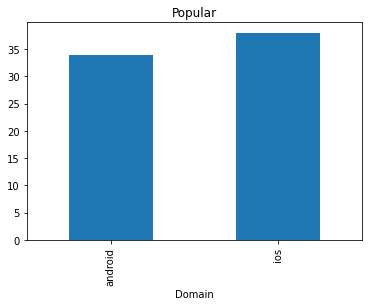

In [16]:
dom_count_p.plot.bar()
plt.title('Popular')

In [18]:
data_np = data2[data2['stars_count'] <= 100]
data_np

,stars_count,Language,Domain,created year,commits_count_total,contributors_count_max,minor_count_max
1,1,Java,android,2012,2,1,0
2,23,Java,android,2010,42,2,1
3,1,Markdown,ios,2019,6,1,0
4,2,Java,android,2011,5,1,0
5,0,Java,android,2020,146,3,1
...,...,...,...,...,...,...,...
303,22,Shell,android,2020,47,2,2
304,1,Objective-C,ios,2012,4,1,0
305,0,Objective-C,ios,2013,7,2,1
306,6,Objective-C,ios,2011,9,1,0


In [19]:
print(len(data_np))

236


In [20]:
dom_count_np = data_np.groupby('Domain').size()
dom_count_np

Domain
android    134
ios        102
dtype: int64

Text(0.5, 1.0, 'Non-Popular')

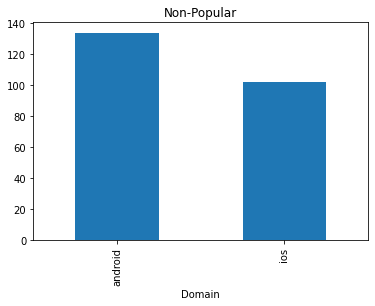

In [21]:
dom_count_np.plot.bar()
plt.title('Non-Popular')

In [22]:
# RQ1
data_1213 = data_p[data_p['created year'].isin(['2012', '2013'])]
data_1213

,stars_count,Language,Domain,created year,commits_count_total,contributors_count_max,minor_count_max
56,28300,JavaScript,ios,2012,577,5,46
58,32100,Kotlin,android,2012,3628,5,12
102,826,C,ios,2012,8,2,1
133,116,Objective-C,ios,2012,13,2,1
143,84800,Markdown,android,2013,911,4,124
224,395,Objective-C,ios,2012,114,2,1
225,199,Objective-C,ios,2012,73,2,2
249,1500,Objective-C,ios,2013,4516,4,16
262,32000,Java,android,2013,2618,6,23
266,29700,C,android,2013,2627,4,14


In [25]:
lan_count_1213 = data_1213.groupby('Language').size()
lan_count_1213

Language
C              2
Java           1
JavaScript     1
Kotlin         1
Markdown       1
Objective-C    4
dtype: int64

Text(0.5, 1.0, '2012-2013')

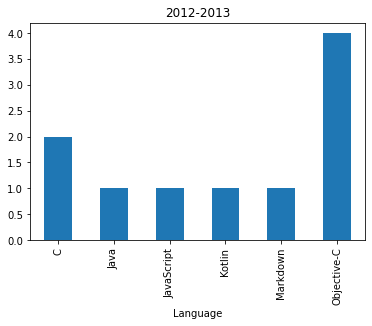

In [27]:
lan_count_1213.plot.bar()
plt.title('2012-2013')

In [28]:
data_1415 = data_p[data_p['created year'].isin(['2014', '2015'])]
data_1415

,stars_count,Language,Domain,created year,commits_count_total,contributors_count_max,minor_count_max
12,361,Java,android,2014,2061,7,24
27,30800,Markdown,android,2014,954,2,115
34,10900,Markdown,ios,2014,1635,4,43
49,27000,Kotlin,android,2015,1631,7,30
67,21100,Swift,ios,2015,3596,7,65
107,272,Kotlin,ios,2015,4511,5,10
196,44500,Markdown,ios,2014,155,5,10


In [32]:
lan_count_1415 = data_1415.groupby('Language').size()
lan_count_1415

Language
Java        1
Kotlin      2
Markdown    3
Swift       1
dtype: int64

Text(0.5, 1.0, '2014-2015')

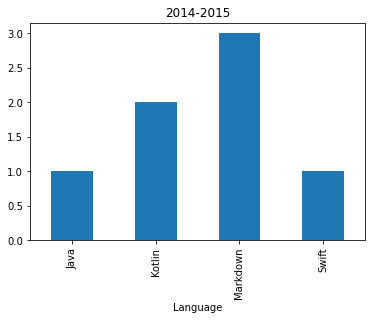

In [33]:
lan_count_1415.plot.bar()
plt.title('2014-2015')

In [31]:
data_1617 = data_p[data_p['created year'].isin(['2016', '2017'])]
data_1617

,stars_count,Language,Domain,created year,commits_count_total,contributors_count_max,minor_count_max
10,7300,TypeScript,ios,2016,1808,6,44
22,3000,Java,android,2017,417,6,8
37,13300,C++,ios,2017,2330,6,26
51,38400,Dart,ios,2017,1741,3,263
69,21700,TypeScript,ios,2016,2139,8,57
85,146,Kotlin,ios,2017,2010,2,1
86,146,Kotlin,android,2017,2010,2,1
105,1100,C++,ios,2016,3350,7,29
139,627,Swift,ios,2016,1550,3,3
153,230,EJS,android,2017,1127,4,3


In [34]:
lan_count_1617 = data_1617.groupby('Language').size()
lan_count_1617

Language
C              1
C++            2
Dart           4
EJS            1
Java           3
Kotlin         3
Markdown       4
Objective-C    2
Swift          3
TypeScript     2
dtype: int64

Text(0.5, 1.0, '2016-2017')

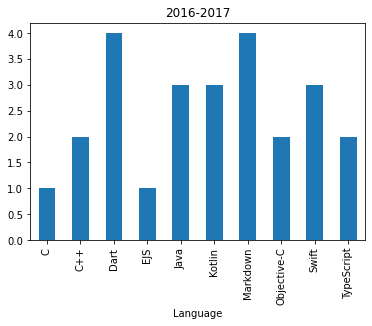

In [35]:
lan_count_1617.plot.bar()
plt.title('2016-2017')

In [36]:
data_1819 = data_p[data_p['created year'].isin(['2018', '2019'])]
data_1819

,stars_count,Language,Domain,created year,commits_count_total,contributors_count_max,minor_count_max
20,8100,Python,ios,2018,2631,2,15
26,289,Ruby,android,2019,2428,3,1
89,422,C,android,2018,2971,7,12
108,656,JavaScript,android,2018,1454,8,16
120,897,Kotlin,android,2019,2652,7,15
129,270,Kotlin,android,2019,2861,6,7
152,6500,TypeScript,android,2018,774,6,9
176,15900,Dart,ios,2018,52,2,6
186,705,Swift,ios,2018,1554,3,3
194,184,HTML,android,2019,3161,3,15


In [37]:
lan_count_1819 = data_1819.groupby('Language').size()
lan_count_1819

Language
C             1
Dart          1
HTML          1
Java          1
JavaScript    1
Kotlin        3
Python        1
Ruby          1
Swift         3
TypeScript    2
dtype: int64

Text(0.5, 1.0, '2018-2019')

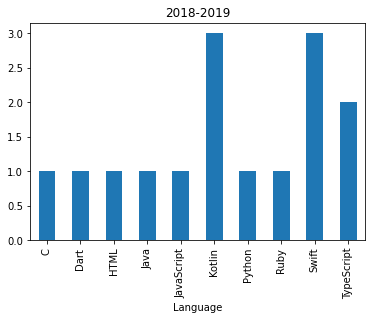

In [38]:
lan_count_1819.plot.bar()
plt.title('2018-2019')

In [39]:
data_2021 = data_p[data_p['created year'].isin(['2020', '2021'])]
data_2021

,stars_count,Language,Domain,created year,commits_count_total,contributors_count_max,minor_count_max
19,19400,Python,ios,2020,1663,3,40
122,2200,Markdown,android,2021,63,4,5
126,435,Kotlin,android,2021,610,5,12
182,328,C++,android,2020,3892,1,1
227,636,Python,android,2021,17,1,0
263,512,Rust,ios,2020,456,3,4


In [40]:
lan_count_2021 = data_2021.groupby('Language').size()
lan_count_2021

Language
C++         1
Kotlin      1
Markdown    1
Python      2
Rust        1
dtype: int64

Text(0.5, 1.0, '2020-2021')

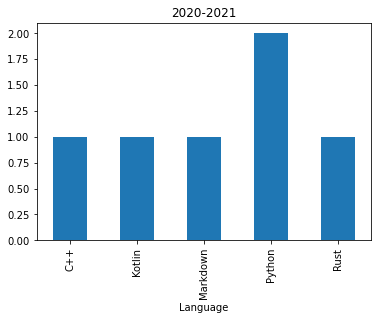

In [41]:
lan_count_2021.plot.bar()
plt.title('2020-2021')